# Adaboost classifier

In [86]:
# Import guys
import pandas as pd
import numpy as np
from scipy import sparse
# from AdaBoostClassifier import AdaBoostClassifier
%run AdaBoostClassifier.py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Import data
We should leverage the sparse matrix format.

https://towardsdatascience.com/working-with-sparse-data-sets-in-pandas-and-sklearn-d26c1cfbe067

This shit is incredible

In [57]:
# column names
with open('data/column_names.txt', 'r') as f:
    column_names = [line.strip() for line in f]

sparse_dat = sparse.load_npz("data/sparse_df.npz")

In [58]:
# Extract labels from the first column
labels = sparse_dat[:, 0]

# Create a list of column indices to keep
to_keep = list(set(range(sparse_dat.shape[1])) - set([0]))

# Extract the design matrix
X = sparse_dat[:, to_keep]

print(f'labels: \n{labels}')

labels: 
  (2, 0)	1
  (5, 0)	1
  (8, 0)	1
  (9, 0)	1
  (11, 0)	1
  (12, 0)	1
  (15, 0)	1
  (19, 0)	1
  (34, 0)	1
  (42, 0)	1
  (54, 0)	1
  (56, 0)	1
  (65, 0)	1
  (67, 0)	1
  (68, 0)	1
  (93, 0)	1
  (95, 0)	1
  (114, 0)	1
  (117, 0)	1
  (120, 0)	1
  (121, 0)	1
  (123, 0)	1
  (134, 0)	1
  (135, 0)	1
  (139, 0)	1
  :	:
  (15952, 0)	1
  (15953, 0)	1
  (15954, 0)	1
  (15955, 0)	1
  (15956, 0)	1
  (15957, 0)	1
  (15958, 0)	1
  (15959, 0)	1
  (15960, 0)	1
  (15961, 0)	1
  (15962, 0)	1
  (15963, 0)	1
  (15964, 0)	1
  (15965, 0)	1
  (15966, 0)	1
  (15967, 0)	1
  (15968, 0)	1
  (15969, 0)	1
  (15970, 0)	1
  (15971, 0)	1
  (15972, 0)	1
  (15973, 0)	1
  (15974, 0)	1
  (15975, 0)	1
  (15976, 0)	1


In [59]:
print(f'Design matrix: \n{X}')

Design matrix: 
  (17173, 0)	1
  (17240, 0)	2
  (17164, 1)	1
  (17363, 1)	1
  (17448, 1)	1
  (17910, 1)	1
  (17914, 1)	1
  (17933, 1)	2
  (15801, 2)	1
  (15867, 2)	1
  (16217, 2)	1
  (17173, 2)	3
  (17189, 2)	1
  (17386, 2)	1
  (17765, 2)	4
  (17933, 3)	2
  (17325, 4)	1
  (17366, 4)	1
  (16271, 5)	1
  (16837, 5)	1
  (17933, 6)	2
  (17933, 7)	2
  (17173, 8)	2
  (17933, 8)	1
  (15801, 9)	1
  :	:
  (8386, 56199)	2
  (8669, 56200)	1
  (10316, 56200)	1
  (8805, 56201)	1
  (9218, 56201)	1
  (9565, 56202)	1
  (9814, 56202)	1
  (6232, 56203)	1
  (9353, 56203)	1
  (5661, 56204)	9
  (6860, 56204)	1
  (8698, 56204)	1
  (125, 56205)	1
  (1228, 56205)	1
  (4422, 56205)	1
  (5648, 56206)	1
  (7464, 56206)	1
  (5648, 56207)	2
  (6025, 56208)	2
  (6025, 56209)	2
  (6151, 56210)	2
  (8669, 56211)	1
  (10316, 56211)	1
  (6340, 56212)	1
  (8696, 56212)	1


# Issue: 
Why the hell are these numbers so large. Something something is up with the compressed numbers thing.
Edit: Nick is a God. Something was up with the dataframe copy. He fixed it. Jonathan likes men.

### Train/test

In [78]:
# To do - stratify the split 
n_samples = labels.shape[0]
# Use train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.dtype)
print("proportion of spam in training data:", (y_train == 1).sum().item() / y_train.shape[0])
print("proportion of spam in testing data:", (y_test == 1).sum().item() / y_test.shape[0])

(14524, 56213)
(14524, 1)
(3632, 56213)
(3632, 1)
int64
proportion of spam in training data: 0.39568989259157256
proportion of spam in testing data: 0.11921806167400881


In [75]:
print(np.unique(y_test.toarray()))

[0 1]


# Model Training + Test Set Evaluation

In [61]:
def errors(y, y_pred):
        """
        Calculate the proportion of type 2 errors - when the true label is 1 - spam, and the predicted label is 0 - ham

        Args:
        y: true labels
        y_pred: predicted labels
        """
        n = y.shape[0]
        type2errors = ((y == 1) & (y_pred == 0)).sum().item()
        type1errors = ((y == 0) & (y_pred == 1)).sum().item()
        correct = (y_pred == y).sum().item()
        return type2errors, type1errors, correct

In [89]:
%run AdaBoostClassifier.py

aboost1 = AdaBoostClassifier(n_estimators = 50, lr = 0.01, type2penalty = False, max_DT_depth = None)
aboost1.fit(X = X_train, y = y_train.toarray().ravel())

predictions = aboost1.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
print(aboost1.weights)

Accuracy:  0.33287444933920707
unique predictions - should be 0 and 1: [0. 1.]
type 2 errors: 0 
 type 1 errors: 2423
[6.71828702e-05 6.71828702e-05 6.71828702e-05 ... 6.85400542e-05
 7.27783345e-05 6.71828702e-05]


(14524,)


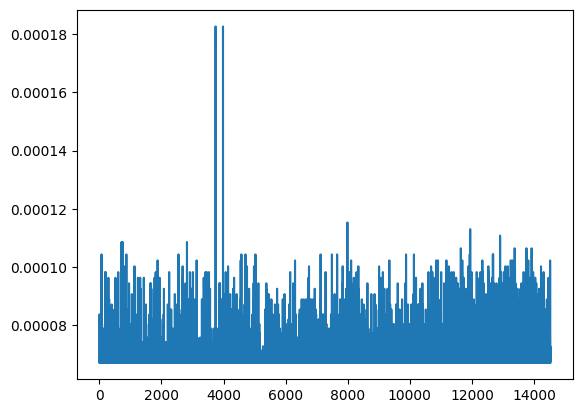

In [90]:
plt.plot(aboost1.weights)
print(aboost1.weights.shape)

In [63]:
aboost2 = AdaBoostClassifier(n_estimators = 50, lr = 0.01, type2penalty = True, max_DT_depth = None)
aboost2.fit(X = X_train, y = y_train.toarray().ravel())

predictions = aboost2.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
print(aboost2.weights)

Accuracy:  1.0
unique predictions - should be 0 and 1: [0. 1.]
type 2 errors: 0 
 type 1 errors: 0
[6.8851556e-05 6.8851556e-05 6.8851556e-05 ... 6.8851556e-05 6.8851556e-05
 6.8851556e-05]


# Training Set Evaluation

In [91]:
predictions = aboost1.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Model 1 (no penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')

Model 1 (no penalty) Training set Accuracy:  0.9042963370972184
unique predictions - should be 0 and 1: [0. 1.]
type 2 errors: 2 
 type 1 errors: 1388


In [65]:
predictions = aboost2.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Model 2 (penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')

Model 2 (penalty) Training set Accuracy:  1.0
unique predictions - should be 0 and 1: [0. 1.]
type 2 errors: 0 
 type 1 errors: 0
